# decision tree regression


In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("../data/Hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

<Axes: xlabel='Years', ylabel='Hits'>

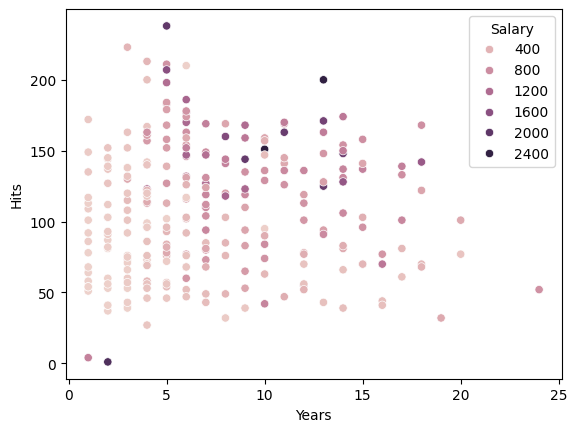

In [116]:
df.dropna(inplace=True)

sns.scatterplot(df, x="Years",y="Hits",hue="Salary")

In [117]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

model_tree_reg = DecisionTreeRegressor(max_depth=2)

X, y = df[["Years","Hits"]], df["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((210, 2), (53, 2))

<Axes: xlabel='Years', ylabel='Hits'>

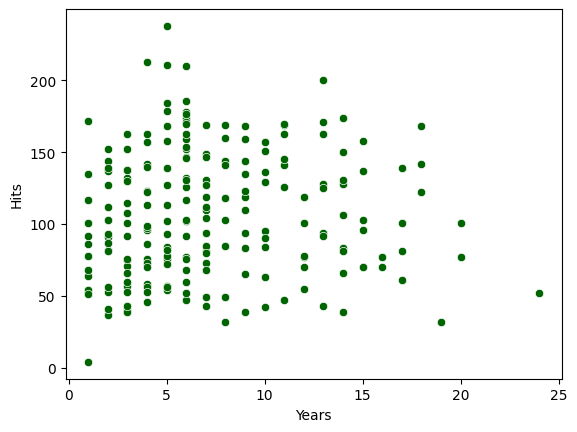

In [118]:
sns.scatterplot(data=X_train, x="Years",y="Hits",color="darkgreen")

<Axes: >

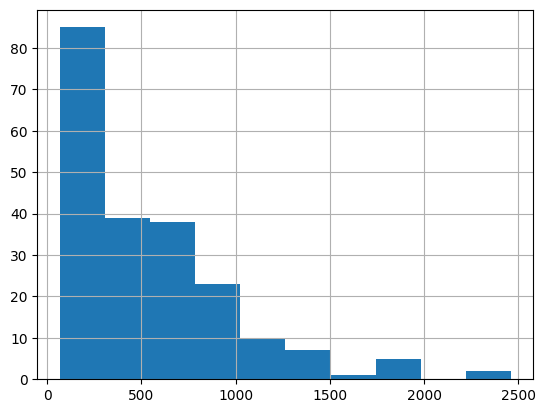

In [119]:
y_train.hist()

In [120]:
model_tree_reg.fit(X_train,y_train)
model_tree_reg.feature_importances_

array([0.58742156, 0.41257844])

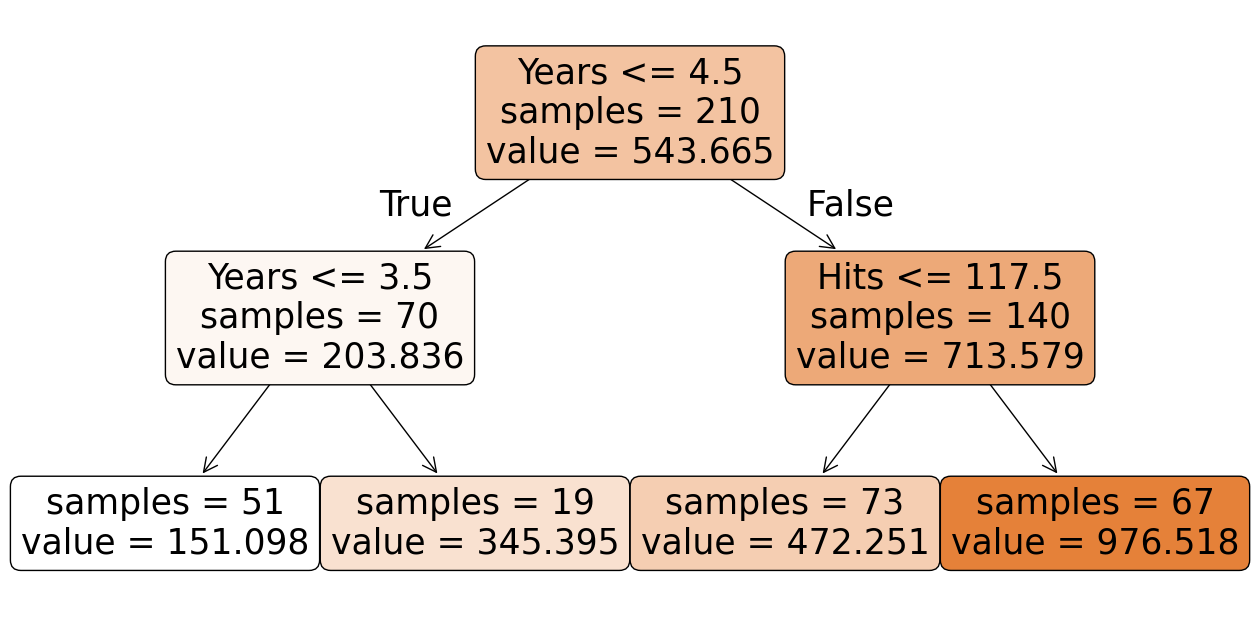

In [121]:
from sklearn import tree

fig, ax = plt.figure(figsize=(16,8), dpi=100), plt.axes()

tree.plot_tree(model_tree_reg, filled=True, ax=ax, feature_names=list(X.columns), impurity=False, rounded=True);

In [122]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model_tree_reg.predict(X_test)

mean_absolute_error(y_test,y_pred), np.sqrt(mean_squared_error(y_test,y_pred))

(235.0067581537342, np.float64(379.69119483603174))

In [123]:
df = pd.read_csv("../data/Default.csv")
df = pd.get_dummies(df, drop_first=True)

df.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,False,False
1,817.180407,12106.134700,False,True
2,1073.549164,31767.138947,False,False
3,529.250605,35704.493935,False,False
4,785.655883,38463.495879,False,False


In [124]:
X, y = df.drop("default_Yes", axis=1), df["default_Yes"]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((8000, 3), (2000, 3))

              precision    recall  f1-score   support

       False       0.98      0.98      0.98      1931
        True       0.37      0.33      0.35        69

    accuracy                           0.96      2000
   macro avg       0.67      0.66      0.66      2000
weighted avg       0.96      0.96      0.96      2000



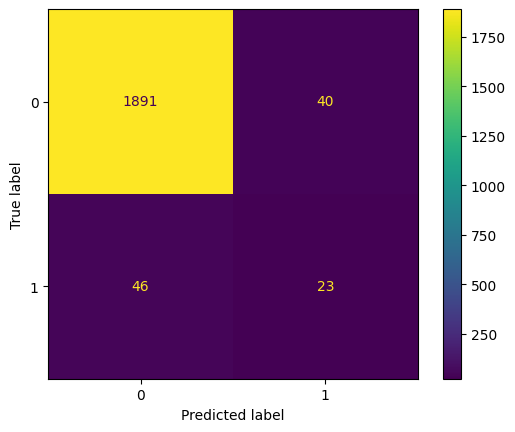

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()